/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/271 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/segformer/image_processing_segformer.py:101: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  warnings.warn(


config.json:   0%|          | 0.00/1.73k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/109M [00:00<?, ?B/s]

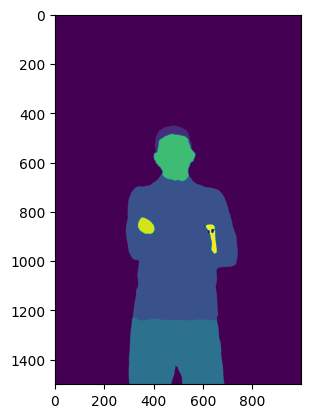

In [1]:
from transformers import SegformerImageProcessor, AutoModelForSemanticSegmentation
from PIL import Image
import requests
import matplotlib.pyplot as plt
import torch.nn as nn

processor = SegformerImageProcessor.from_pretrained("mattmdjaga/segformer_b2_clothes")
model = AutoModelForSemanticSegmentation.from_pretrained("mattmdjaga/segformer_b2_clothes")

url = "https://plus.unsplash.com/premium_photo-1673210886161-bfcc40f54d1f?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MXx8cGVyc29uJTIwc3RhbmRpbmd8ZW58MHx8MHx8&w=1000&q=80"

image = Image.open(requests.get(url, stream=True).raw)
inputs = processor(images=image, return_tensors="pt")

outputs = model(**inputs)
logits = outputs.logits.cpu()

upsampled_logits = nn.functional.interpolate(
    logits,
    size=image.size[::-1],
    mode="bilinear",
    align_corners=False,
)

pred_seg = upsampled_logits.argmax(dim=1)[0]
plt.imshow(pred_seg)


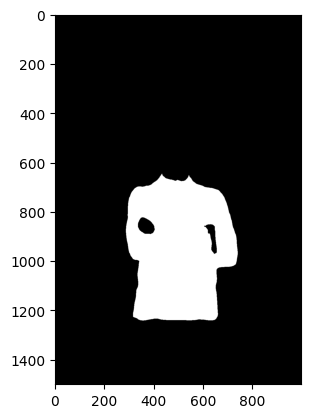

In [2]:
from transformers import SegformerImageProcessor, AutoModelForSemanticSegmentation
from PIL import Image
import requests
import matplotlib.pyplot as plt
import torch.nn as nn

# Load the Segformer model and processor
processor = SegformerImageProcessor.from_pretrained("mattmdjaga/segformer_b2_clothes")
model = AutoModelForSemanticSegmentation.from_pretrained("mattmdjaga/segformer_b2_clothes")

# Load an image from a URL
url = "https://plus.unsplash.com/premium_photo-1673210886161-bfcc40f54d1f?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MXx8cGVyc29uJTIwc3RhbmRpbmd8ZW58MHx8MHx8&w=1000&q=80"
image = Image.open(requests.get(url, stream=True).raw)

# Process the image and obtain model inputs
inputs = processor(images=image, return_tensors="pt")

# Forward pass through the model to get segmentation logits
outputs = model(**inputs)
logits = outputs.logits.cpu()

# Upsample the logits to the original image size
upsampled_logits = nn.functional.interpolate(
    logits,
    size=image.size[::-1],
    mode="bilinear",
    align_corners=False,
)

# Get the predicted segmentation mask for "Upper-clothes" (label 4)
pred_upper_clothes = (upsampled_logits.argmax(dim=1)[0] == 4).float()

# Display the segmented image for "Upper-clothes"
plt.imshow(pred_upper_clothes, cmap='gray')
plt.show()


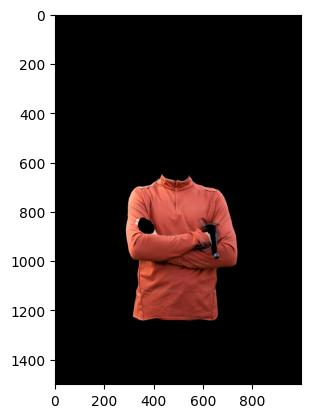

In [11]:
from transformers import SegformerImageProcessor, AutoModelForSemanticSegmentation
from PIL import Image
import requests
import matplotlib.pyplot as plt
import torch.nn as nn
import torch
import numpy as np

# Load the Segformer model and processor
processor = SegformerImageProcessor.from_pretrained("mattmdjaga/segformer_b2_clothes")
model = AutoModelForSemanticSegmentation.from_pretrained("mattmdjaga/segformer_b2_clothes")

# Load an image from a URL
url = "https://plus.unsplash.com/premium_photo-1673210886161-bfcc40f54d1f?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MXx8cGVyc29uJTIwc3RhbmRpbmd8ZW58MHx8MHx8&w=1000&q=80"
image = Image.open(requests.get(url, stream=True).raw)

# Process the image and obtain model inputs
inputs = processor(images=image, return_tensors="pt")

# Forward pass through the model to get segmentation logits
outputs = model(**inputs)
logits = outputs.logits.cpu()

# Upsample the logits to the original image size
upsampled_logits = nn.functional.interpolate(
    logits,
    size=image.size[::-1],
    mode="bilinear",
    align_corners=False,
)

# Get the predicted segmentation mask for "Upper-clothes" (label 4)
pred_upper_clothes = (upsampled_logits.argmax(dim=1)[0] == 4).float()

# Convert the mask to a tensor with three channels to match the original image
pred_upper_clothes_rgb = torch.stack([pred_upper_clothes] * 3, dim=0)

# Convert the original image to a PyTorch tensor
image_tensor = torch.tensor(np.array(image)).permute(2, 0, 1).float() / 255.0

# Blend the original image with the segmented "Upper-clothes" region
result_image = (pred_upper_clothes_rgb * image_tensor).numpy().transpose(1, 2, 0)

# Display the result
plt.imshow(result_image)
plt.show()


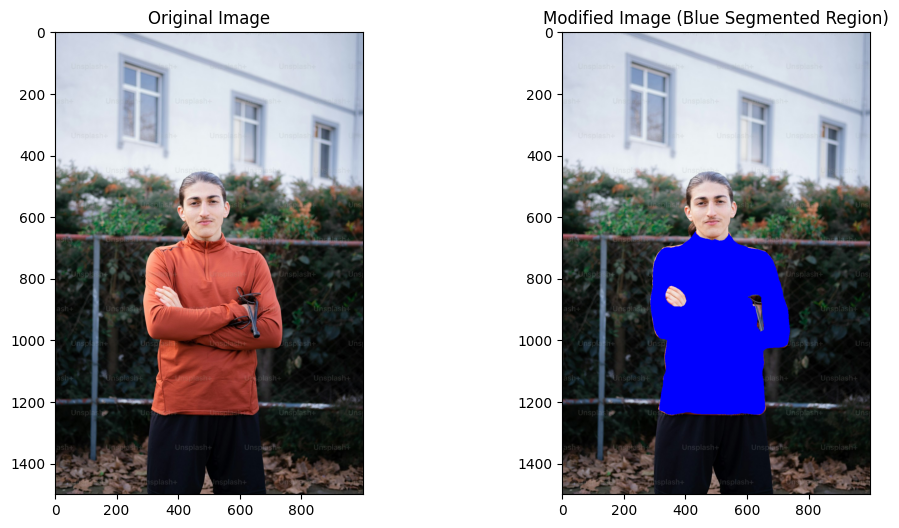

In [12]:
from transformers import SegformerImageProcessor, AutoModelForSemanticSegmentation
from PIL import Image
import requests
import matplotlib.pyplot as plt
import torch.nn as nn
import torch
import numpy as np

processor = SegformerImageProcessor.from_pretrained("mattmdjaga/segformer_b2_clothes")
model = AutoModelForSemanticSegmentation.from_pretrained("mattmdjaga/segformer_b2_clothes")

url = "https://plus.unsplash.com/premium_photo-1673210886161-bfcc40f54d1f?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MXx8cGVyc29uJTIwc3RhbmRpbmd8ZW58MHx8MHx8&w=1000&q=80"
image = Image.open(requests.get(url, stream=True).raw)

inputs = processor(images=image, return_tensors="pt")

outputs = model(**inputs)
logits = outputs.logits.cpu()

upsampled_logits = nn.functional.interpolate(
    logits,
    size=image.size[::-1],
    mode="bilinear",
    align_corners=False,
)

pred_upper_clothes = (upsampled_logits.argmax(dim=1)[0] == 4).float()

# Create a blue tensor with the same size as the image
blue_tensor = torch.zeros_like(image_tensor)
blue_tensor[2, :, :] = 1.0  # Set blue channel to 1, making it completely blue

# Replace the segmented region with blue color
result_image = (pred_upper_clothes_rgb * blue_tensor + (1 - pred_upper_clothes_rgb) * image_tensor).numpy().transpose(1, 2, 0)

# Display the original and modified images
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(np.array(image))
axs[0].set_title('Original Image')

axs[1].imshow(result_image)
axs[1].set_title('Modified Image (Blue Segmented Region)')

plt.show()


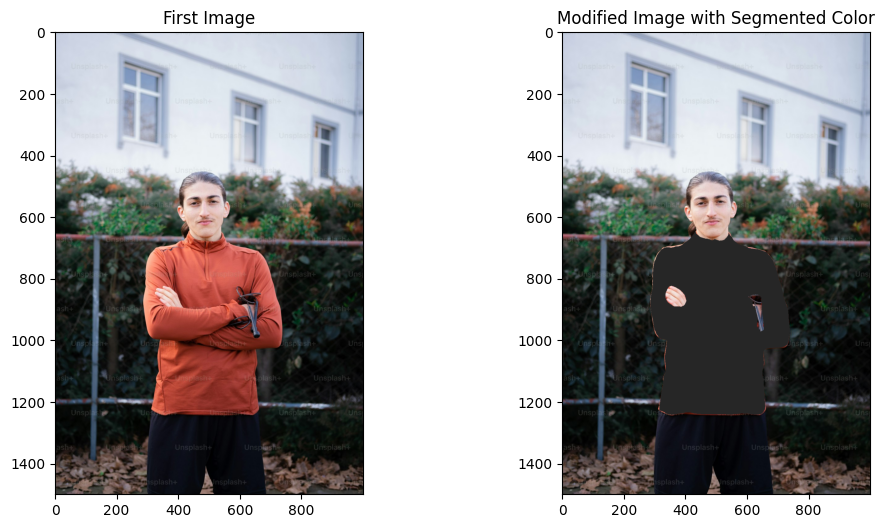

In [19]:
from transformers import SegformerImageProcessor, AutoModelForSemanticSegmentation
from PIL import Image
import requests
import matplotlib.pyplot as plt
import torch.nn as nn
import torch
import numpy as np

# First image
first_image_url = "https://plus.unsplash.com/premium_photo-1673210886161-bfcc40f54d1f?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MXx8cGVyc29uJTIwc3RhbmRpbmd8ZW58MHx8MHx8&w=1000&q=80"
first_image = Image.open(requests.get(first_image_url, stream=True).raw)

# Second image for color scanning
second_image_url = "https://www.aristobrat.in/cdn/shop/products/ClassicShirt_FrenchBlue1.jpg?v=1667207840&width=2048"
second_image = Image.open(requests.get(second_image_url, stream=True).raw)

# Load the pre-trained segmentation model
processor = SegformerImageProcessor.from_pretrained("mattmdjaga/segformer_b2_clothes")
model = AutoModelForSemanticSegmentation.from_pretrained("mattmdjaga/segformer_b2_clothes")

# Process the second image for segmentation
inputs_second = processor(images=second_image, return_tensors="pt")
outputs_second = model(**inputs_second)
logits_second = outputs_second.logits.cpu()

upsampled_logits_second = nn.functional.interpolate(
    logits_second,
    size=second_image.size[::-1],
    mode="bilinear",
    align_corners=False,
)

pred_upper_clothes_second = (upsampled_logits_second.argmax(dim=1)[0] == 4).float()

# Convert the second image to tensor
second_image_tensor = torch.tensor(np.array(second_image)).permute(2, 0, 1).float() / 255.0

# Scan color from the second image
segmented_color = torch.mean(second_image_tensor[:, pred_upper_clothes_second.bool()], dim=1)

# Apply the segmented color to the first image
result_image = (pred_upper_clothes_rgb[0] * segmented_color[0] + (1 - pred_upper_clothes_rgb[0]) * image_tensor).numpy().transpose(1, 2, 0)

# Display the original and modified images
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(np.array(first_image))
axs[0].set_title('First Image')

axs[1].imshow(result_image)
axs[1].set_title('Modified Image with Segmented Color')

plt.show()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/segformer/image_processing_segformer.py:101: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  warnings.warn(


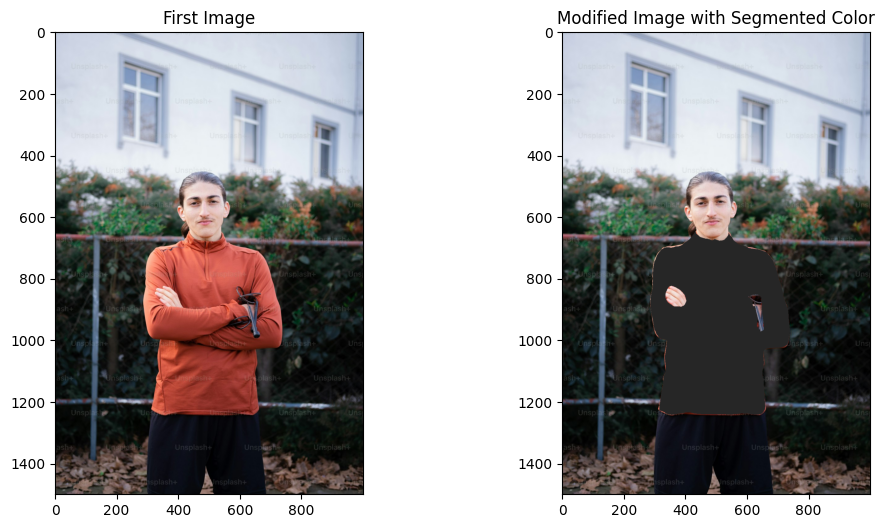

In [1]:
from transformers import SegformerImageProcessor, AutoModelForSemanticSegmentation
from PIL import Image
import requests
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np

processor = SegformerImageProcessor.from_pretrained("mattmdjaga/segformer_b2_clothes")
model = AutoModelForSemanticSegmentation.from_pretrained("mattmdjaga/segformer_b2_clothes")



first_image_url = "https://plus.unsplash.com/premium_photo-1673210886161-bfcc40f54d1f?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MXx8cGVyc29uJTIwc3RhbmRpbmd8ZW58MHx8MHx8&w=1000&q=80"
first_image = Image.open(requests.get(first_image_url, stream=True).raw)
inputs_first = processor(images=first_image, return_tensors="pt")
outputs_first = model(**inputs_first)
logits_first = outputs_first.logits.cpu()
upsampled_logits_first = nn.functional.interpolate(
    logits_first,
    size=first_image.size[::-1],
    mode="bilinear",
    align_corners=False,
)
pred_upper_clothes_first = (upsampled_logits_first.argmax(dim=1)[0] == 4).float()
pred_upper_clothes_rgb_first = torch.stack([pred_upper_clothes_first] * 3, dim=0)
first_image_tensor = torch.tensor(np.array(first_image)).permute(2, 0, 1).float() / 255.0




second_image_url = "https://www.aristobrat.in/cdn/shop/products/ClassicShirt_FrenchBlue1.jpg?v=1667207840&width=2048"
second_image = Image.open(requests.get(second_image_url, stream=True).raw)
inputs_second = processor(images=second_image, return_tensors="pt")
outputs_second = model(**inputs_second)
logits_second = outputs_second.logits.cpu()
upsampled_logits_second = nn.functional.interpolate(
    logits_second,
    size=second_image.size[::-1],
    mode="bilinear",
    align_corners=False,
)
pred_upper_clothes_second = (upsampled_logits_second.argmax(dim=1)[0] == 4).float()
pred_upper_clothes_rgb_second = torch.stack([pred_upper_clothes_second] * 3, dim=0)
second_image_tensor = torch.tensor(np.array(second_image)).permute(2, 0, 1).float() / 255.0




segmented_color = torch.mean(second_image_tensor[:, pred_upper_clothes_second.bool()], dim=1)

result_image = (pred_upper_clothes_rgb_first[0] * segmented_color[0] + (1 - pred_upper_clothes_rgb_first[0]) * first_image_tensor).numpy().transpose(1, 2, 0)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(np.array(first_image))
axs[0].set_title('First Image')

axs[1].imshow(result_image)
axs[1].set_title('Modified Image with Segmented Color')

plt.show()

In [3]:
from transformers import SegformerImageProcessor, AutoModelForSemanticSegmentation
from PIL import Image
import requests
import matplotlib.pyplot as plt
import torch.nn as nn
import torch
import numpy as np

# First image
first_image_url = "https://plus.unsplash.com/premium_photo-1673210886161-bfcc40f54d1f?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MXx8cGVyc29uJTIwc3RhbmRpbmd8ZW58MHx8MHx8&w=1000&q=80"
first_image = Image.open(requests.get(first_image_url, stream=True).raw)

# Second image for color scanning
second_image_url = "https://www.aristobrat.in/cdn/shop/products/ClassicShirt_FrenchBlue1.jpg?v=1667207840&width=2048"
second_image = Image.open(requests.get(second_image_url, stream=True).raw)

# Load the pre-trained segmentation model
processor = SegformerImageProcessor.from_pretrained("mattmdjaga/segformer_b2_clothes")
model = AutoModelForSemanticSegmentation.from_pretrained("mattmdjaga/segformer_b2_clothes")

# Process the second image for segmentation
inputs_second = processor(images=second_image, return_tensors="pt")
outputs_second = model(**inputs_second)
logits_second = outputs_second.logits.cpu()

upsampled_logits_second = nn.functional.interpolate(
    logits_second,
    size=second_image.size[::-1],
    mode="bilinear",
    align_corners=False,
)

pred_upper_clothes_second = (upsampled_logits_second.argmax(dim=1)[0] == 4).float()
pred_upper_clothes_rgb = torch.stack([pred_upper_clothes] * 3, dim=0)

# Resize the second image to match the size of the segmented region in the first image
resized_second_image = second_image.resize((first_image.width, first_image.height))

# Convert the resized second image to tensor
resized_second_image_tensor = torch.tensor(np.array(resized_second_image)).permute(2, 0, 1).float() / 255.0

# Apply the resized second image to the first image in the segmented region
result_image = (pred_upper_clothes_rgb[0] * resized_second_image_tensor + (1 - pred_upper_clothes_rgb[0]) * image_tensor).numpy().transpose(1, 2, 0)

# Display the original and modified images
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(np.array(first_image))
axs[0].set_title('First Image')

axs[1].imshow(result_image)
axs[1].set_title('Modified Image with Segmented Image Color')

plt.show()


NameError: name 'pred_upper_clothes' is not defined

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/segformer/image_processing_segformer.py:101: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  warnings.warn(


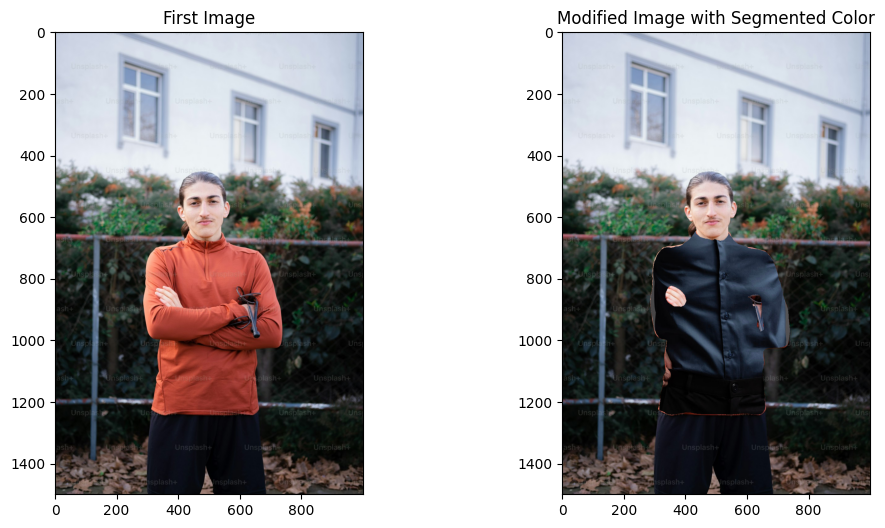

In [1]:
from transformers import SegformerImageProcessor, AutoModelForSemanticSegmentation
from PIL import Image
import requests
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np

processor = SegformerImageProcessor.from_pretrained("mattmdjaga/segformer_b2_clothes")
model = AutoModelForSemanticSegmentation.from_pretrained("mattmdjaga/segformer_b2_clothes")



first_image_url = "https://plus.unsplash.com/premium_photo-1673210886161-bfcc40f54d1f?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MXx8cGVyc29uJTIwc3RhbmRpbmd8ZW58MHx8MHx8&w=1000&q=80"
first_image = Image.open(requests.get(first_image_url, stream=True).raw)

inputs_first = processor(images=first_image, return_tensors="pt")
outputs_first = model(**inputs_first)
logits_first = outputs_first.logits.cpu()
upsampled_logits_first = nn.functional.interpolate(
    logits_first,
    size=first_image.size[::-1],
    mode="bilinear",
    align_corners=False,
)
pred_upper_clothes_first = (upsampled_logits_first.argmax(dim=1)[0] == 4).float()
pred_upper_clothes_rgb_first = torch.stack([pred_upper_clothes_first] * 3, dim=0)
first_image_tensor = torch.tensor(np.array(first_image)).permute(2, 0, 1).float() / 255.0




second_image_url = "https://www.aristobrat.in/cdn/shop/products/ClassicShirt_FrenchBlue1.jpg?v=1667207840&width=2048"
second_image = Image.open(requests.get(second_image_url, stream=True).raw)

inputs_second = processor(images=second_image, return_tensors="pt")
outputs_second = model(**inputs_second)
logits_second = outputs_second.logits.cpu()
upsampled_logits_second = nn.functional.interpolate(
    logits_second,
    size=second_image.size[::-1],
    mode="bilinear",
    align_corners=False,
)
pred_upper_clothes_second = (upsampled_logits_second.argmax(dim=1)[0] == 4).float()
pred_upper_clothes_rgb_second = torch.stack([pred_upper_clothes_second] * 3, dim=0)
second_image_tensor = torch.tensor(np.array(second_image)).permute(2, 0, 1).float() / 255.0


resized_second_image = second_image.resize((first_image.width, first_image.height))
resized_second_image_tensor = torch.tensor(np.array(resized_second_image)).permute(2, 0, 1).float() / 255.0



result_image = (pred_upper_clothes_rgb_first[0] * resized_second_image_tensor + (1 - pred_upper_clothes_rgb_first[0]) * first_image_tensor).numpy().transpose(1, 2, 0)


# segmented_color = torch.mean(second_image_tensor[:, pred_upper_clothes_second.bool()], dim=1)

# result_image = (pred_upper_clothes_rgb_first[0] * segmented_color[0] + (1 - pred_upper_clothes_rgb_first[0]) * first_image_tensor).numpy().transpose(1, 2, 0)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(np.array(first_image))
axs[0].set_title('First Image')

axs[1].imshow(result_image)
axs[1].set_title('Modified Image with Segmented Color')

plt.show()

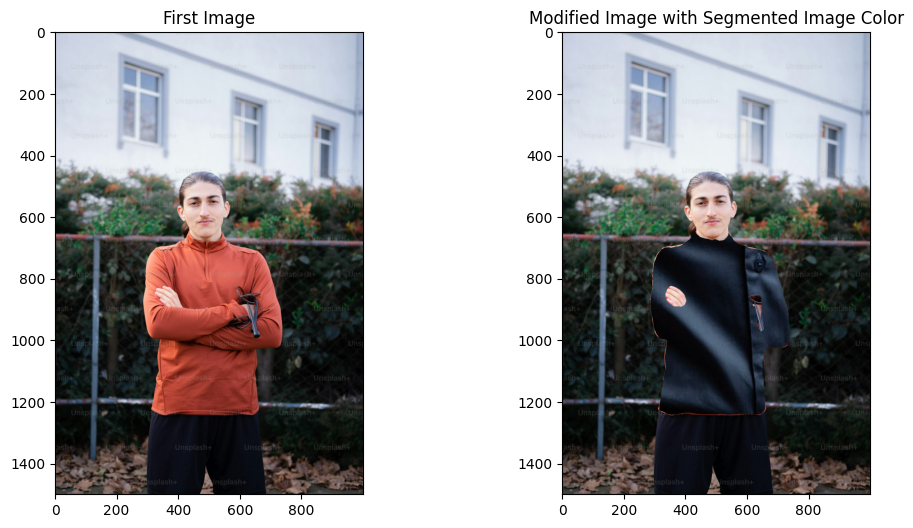

In [21]:
from transformers import SegformerImageProcessor, AutoModelForSemanticSegmentation
from PIL import Image
import requests
import matplotlib.pyplot as plt
import torch.nn as nn
import torch
import numpy as np

# First image
first_image_url = "https://plus.unsplash.com/premium_photo-1673210886161-bfcc40f54d1f?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MXx8cGVyc29uJTIwc3RhbmRpbmd8ZW58MHx8MHx8&w=1000&q=80"
first_image = Image.open(requests.get(first_image_url, stream=True).raw)

# Second image for color scanning
second_image_url = "https://www.aristobrat.in/cdn/shop/products/ClassicShirt_FrenchBlue1.jpg?v=1667207840&width=2048"
second_image = Image.open(requests.get(second_image_url, stream=True).raw)

# Load the pre-trained segmentation model
processor = SegformerImageProcessor.from_pretrained("mattmdjaga/segformer_b2_clothes")
model = AutoModelForSemanticSegmentation.from_pretrained("mattmdjaga/segformer_b2_clothes")

# Process the first image for segmentation
inputs_first = processor(images=first_image, return_tensors="pt")
outputs_first = model(**inputs_first)
logits_first = outputs_first.logits.cpu()

upsampled_logits_first = nn.functional.interpolate(
    logits_first,
    size=first_image.size[::-1],
    mode="bilinear",
    align_corners=False,
)

pred_upper_clothes_first = (upsampled_logits_first.argmax(dim=1)[0] == 4).float()

# Process the second image for segmentation
inputs_second = processor(images=second_image, return_tensors="pt")
outputs_second = model(**inputs_second)
logits_second = outputs_second.logits.cpu()

upsampled_logits_second = nn.functional.interpolate(
    logits_second,
    size=second_image.size[::-1],
    mode="bilinear",
    align_corners=False,
)

pred_upper_clothes_second = (upsampled_logits_second.argmax(dim=1)[0] == 4).float()

# Find the bounding box of the segmented region in the first image
bbox = torch.where(pred_upper_clothes_first.bool())

# Extract the corresponding region from the second image
extracted_region = second_image.crop((int(bbox[1].min()), int(bbox[0].min()), int(bbox[1].max()), int(bbox[0].max())))

# Resize the extracted region to match the size of the segmented region in the first image
resized_extracted_region = extracted_region.resize((first_image.width, first_image.height))

# Convert the resized extracted region to tensor
resized_extracted_region_tensor = torch.tensor(np.array(resized_extracted_region)).permute(2, 0, 1).float() / 255.0

# Apply the resized extracted region to the first image in the segmented region
result_image = (pred_upper_clothes_rgb[0] * resized_extracted_region_tensor + (1 - pred_upper_clothes_rgb[0]) * image_tensor).numpy().transpose(1, 2, 0)

# Display the original and modified images
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(np.array(first_image))
axs[0].set_title('First Image')

axs[1].imshow(result_image)
axs[1].set_title('Modified Image with Segmented Image Color')

plt.show()


In [31]:
from transformers import SegformerImageProcessor, AutoModelForSemanticSegmentation
from PIL import Image
import matplotlib.pyplot as plt
import torch.nn as nn
import torch
import numpy as np

# Replace these file paths with the paths to your local images
first_image_path = "/content/first.jpg"
second_image_path = "/content/second.jpg"

# Load the pre-trained segmentation model
processor = SegformerImageProcessor.from_pretrained("mattmdjaga/segformer_b2_clothes")
model = AutoModelForSemanticSegmentation.from_pretrained("mattmdjaga/segformer_b2_clothes")

# Process the first image for segmentation
first_image = Image.open(first_image_path)

# Process the second image for segmentation
second_image = Image.open(second_image_path)
inputs_second = processor(images=second_image, return_tensors="pt")
outputs_second = model(**inputs_second)
logits_second = outputs_second.logits.cpu()

upsampled_logits_second = nn.functional.interpolate(
    logits_second,
    size=second_image.size[::-1],
    mode="bilinear",
    align_corners=False,
)

pred_upper_clothes_second = (upsampled_logits_second.argmax(dim=1)[0] == 4).float()

# Resize the second image to match the size of the segmented region in the first image
resized_second_image = second_image.resize((first_image.width, first_image.height))

# Convert the resized second image to tensor
resized_second_image_tensor = torch.tensor(np.array(resized_second_image)).permute(2, 0, 1).float() / 255.0

# Apply the resized second image to the first image in the segmented region
# Apply the resized second image to the first image in the segmented region
# Apply the resized second image to the first image in the segmented region
result_image = (
    pred_upper_clothes_second[0][:, None, None] * resized_second_image_tensor
    + (1 - pred_upper_clothes_second[0][:, None, None]) * image_tensor.permute(2, 0, 1).numpy()
).transpose(1, 2, 0)



# Display the original and modified images
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(np.array(first_image))
axs[0].set_title('First Image')

axs[1].imshow(np.array(second_image))
axs[1].set_title('First Image')

axs[2].imshow(result_image)
axs[2].set_title('Modified Image with Segmented Image Color')

plt.show()


RuntimeError: The size of tensor a (3072) must match the size of tensor b (3) at non-singleton dimension 0

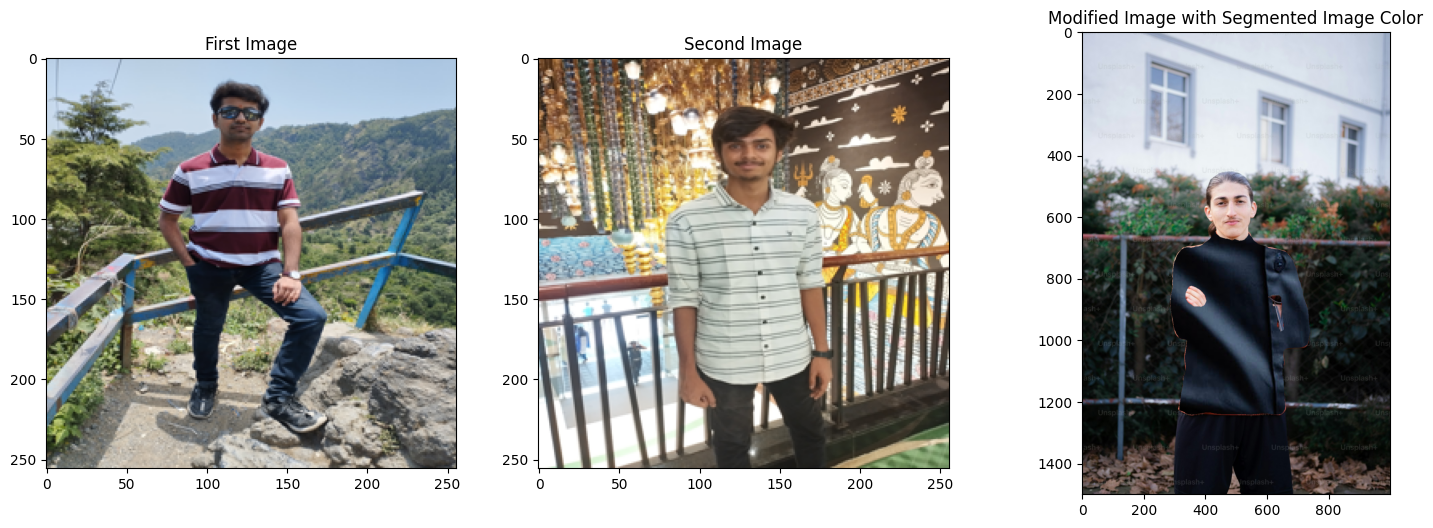

In [33]:
from transformers import SegformerImageProcessor, AutoModelForSemanticSegmentation
from PIL import Image
import matplotlib.pyplot as plt
import torch.nn as nn
import torch
import numpy as np

def process_image(image_path, target_shape=(256, 256, 3)):
    # Open the image
    image = Image.open(image_path)

    # Resize the image to the target shape
    resized_image = image.resize((target_shape[1], target_shape[0]))

    # Convert the resized image to a NumPy array
    image_array = np.array(resized_image)

    # If the image has an alpha channel, remove it
    if image_array.shape[2] > 3:
        image_array = image_array[:, :, :3]

    # Normalize pixel values to the range [0, 1]
    image_array = image_array.astype(np.float32) / 255.0

    # Transpose the image array to match PyTorch's tensor shape (C, H, W)
    image_tensor = torch.tensor(image_array).permute(2, 0, 1)

    return image_tensor

# Replace these file paths with the paths to your local images
first_image_path = "/content/first.jpg"
second_image_path = "/content/second.jpg"

# Load the pre-trained segmentation model
processor = SegformerImageProcessor.from_pretrained("mattmdjaga/segformer_b2_clothes")
model = AutoModelForSemanticSegmentation.from_pretrained("mattmdjaga/segformer_b2_clothes")

# Process the first image for segmentation
first_image_tensor = process_image(first_image_path)

# Process the second image for segmentation
second_image_tensor = process_image(second_image_path)
inputs_second = processor(images=second_image_tensor.unsqueeze(0), return_tensors="pt")
outputs_second = model(**inputs_second)
logits_second = outputs_second.logits.cpu()

upsampled_logits_second = nn.functional.interpolate(
    logits_second,
    size=(second_image_tensor.shape[1], second_image_tensor.shape[2]),
    mode="bilinear",
    align_corners=False,
)

pred_upper_clothes_second = (upsampled_logits_second.argmax(dim=1)[0] == 4).float()

# Resize the second image tensor to match the size of the segmented region in the first image
resized_second_image_tensor = torch.nn.functional.interpolate(
    second_image_tensor.unsqueeze(0),
    size=(first_image_tensor.shape[1], first_image_tensor.shape[2]),
    mode="bilinear",
    align_corners=False,
).squeeze(0)

# Apply the resized second image tensor to the first image in the segmented region
result_image = (
    pred_upper_clothes_second[0] * resized_second_image_tensor +
    (1 - pred_upper_clothes_second[0]) * first_image_tensor
).numpy().transpose(1, 2, 0)

# Display the original and modified images
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].imshow(np.array(first_image_tensor.permute(1, 2, 0)))
axs[0].set_title('First Image')

axs[1].imshow(np.array(second_image_tensor.permute(1, 2, 0)))
axs[1].set_title('Second Image')

axs[2].imshow(result_image)
axs[2].set_title('Modified Image with Segmented Image Color')

plt.show()


In [ ]:
from transformers import SegformerImageProcessor, AutoModelForSemanticSegmentation
from PIL import Image
import requests
import matplotlib.pyplot as plt
import torch.nn as nn
import torch
import numpy as np

first_image_path = "/content/first.jpg"
second_image_path = "/content/second.jpg"

first_image = Image.open(first_image_path)
second_image = Image.open(second_image_path)

processor = SegformerImageProcessor.from_pretrained("mattmdjaga/segformer_b2_clothes")
model = AutoModelForSemanticSegmentation.from_pretrained("mattmdjaga/segformer_b2_clothes")


inputs_second = processor(images=second_image, return_tensors="pt")
outputs_second = model(**inputs_second)
logits_second = outputs_second.logits.cpu()

upsampled_logits_second = nn.functional.interpolate(
    logits_second,
    size=second_image.size[::-1],
    mode="bilinear",
    align_corners=False,
)

pred_upper_clothes_second = (upsampled_logits_second.argmax(dim=1)[0] == 4).float()

resized_second_image = second_image.resize((first_image.width, first_image.height))

resized_second_image_tensor = torch.tensor(np.array(resized_second_image)).permute(2, 0, 1).float() / 255.0


fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(np.array(first_image))
axs[0].set_title('First Image')

axs[1].imshow(result_image)
axs[1].set_title('Modified Image with Segmented Image Color')

plt.show()


/usr/local/lib/python3.10/dist-packages/transformers/models/segformer/image_processing_segformer.py:101: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  warnings.warn(


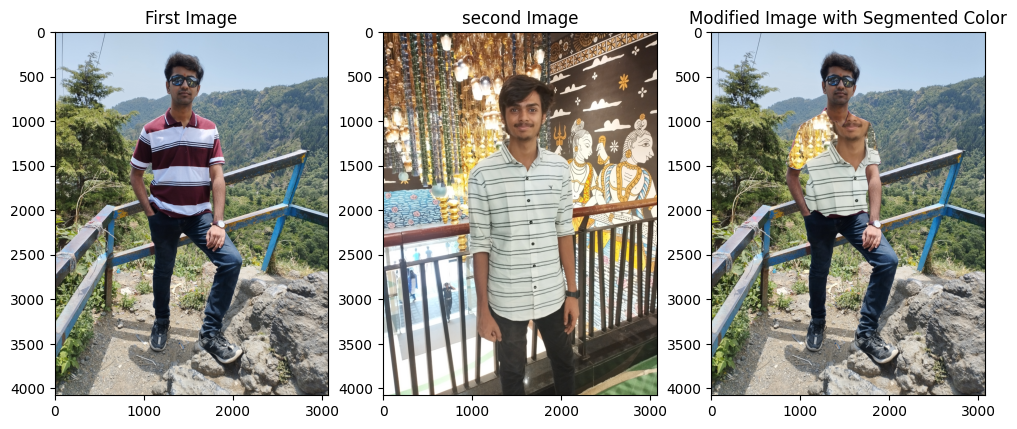

In [3]:
from transformers import SegformerImageProcessor, AutoModelForSemanticSegmentation
from PIL import Image
import requests
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np

processor = SegformerImageProcessor.from_pretrained("mattmdjaga/segformer_b2_clothes")
model = AutoModelForSemanticSegmentation.from_pretrained("mattmdjaga/segformer_b2_clothes")



first_image_path = "/content/first.jpg"
first_image = Image.open(first_image_path)

inputs_first = processor(images=first_image, return_tensors="pt")
outputs_first = model(**inputs_first)
logits_first = outputs_first.logits.cpu()
upsampled_logits_first = nn.functional.interpolate(
    logits_first,
    size=first_image.size[::-1],
    mode="bilinear",
    align_corners=False,
)
pred_upper_clothes_first = (upsampled_logits_first.argmax(dim=1)[0] == 4).float()
pred_upper_clothes_rgb_first = torch.stack([pred_upper_clothes_first] * 3, dim=0)
first_image_tensor = torch.tensor(np.array(first_image)).permute(2, 0, 1).float() / 255.0




second_image_path = "/content/second.jpg"
second_image = Image.open(second_image_path)

inputs_second = processor(images=second_image, return_tensors="pt")
outputs_second = model(**inputs_second)
logits_second = outputs_second.logits.cpu()
upsampled_logits_second = nn.functional.interpolate(
    logits_second,
    size=second_image.size[::-1],
    mode="bilinear",
    align_corners=False,
)
pred_upper_clothes_second = (upsampled_logits_second.argmax(dim=1)[0] == 4).float()
pred_upper_clothes_rgb_second = torch.stack([pred_upper_clothes_second] * 3, dim=0)
second_image_tensor = torch.tensor(np.array(second_image)).permute(2, 0, 1).float() / 255.0


resized_second_image = second_image.resize((first_image.width, first_image.height))
resized_second_image_tensor = torch.tensor(np.array(resized_second_image)).permute(2, 0, 1).float() / 255.0



result_image = (pred_upper_clothes_rgb_first[0] * resized_second_image_tensor + (1 - pred_upper_clothes_rgb_first[0]) * first_image_tensor).numpy().transpose(1, 2, 0)


# segmented_color = torch.mean(second_image_tensor[:, pred_upper_clothes_second.bool()], dim=1)

# result_image = (pred_upper_clothes_rgb_first[0] * segmented_color[0] + (1 - pred_upper_clothes_rgb_first[0]) * first_image_tensor).numpy().transpose(1, 2, 0)

fig, axs = plt.subplots(1, 3, figsize=(12, 6))

axs[0].imshow(np.array(first_image))
axs[0].set_title('First Image')

axs[1].imshow(np.array(second_image))
axs[1].set_title('second Image')

axs[2].imshow(result_image)
axs[2].set_title('Modified Image with Segmented Color')

plt.show()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/segformer/image_processing_segformer.py:101: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  warnings.warn(


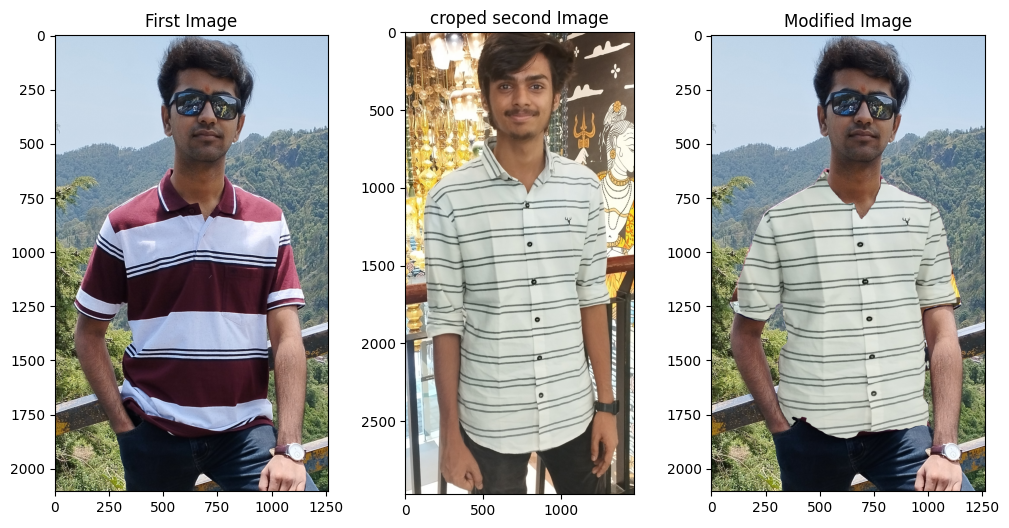

In [1]:
from transformers import SegformerImageProcessor, AutoModelForSemanticSegmentation
from PIL import Image
import requests
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np

processor = SegformerImageProcessor.from_pretrained("mattmdjaga/segformer_b2_clothes")
model = AutoModelForSemanticSegmentation.from_pretrained("mattmdjaga/segformer_b2_clothes")



first_image_path = "/content/Cfirst.jpg"
first_image = Image.open(first_image_path)

inputs_first = processor(images=first_image, return_tensors="pt")
outputs_first = model(**inputs_first)
logits_first = outputs_first.logits.cpu()
upsampled_logits_first = nn.functional.interpolate(
    logits_first,
    size=first_image.size[::-1],
    mode="bilinear",
    align_corners=False,
)
pred_upper_clothes_first = (upsampled_logits_first.argmax(dim=1)[0] == 4).float()
pred_upper_clothes_rgb_first = torch.stack([pred_upper_clothes_first] * 3, dim=0)
first_image_tensor = torch.tensor(np.array(first_image)).permute(2, 0, 1).float() / 255.0




second_image_path = "/content/Csecond.jpg"
second_image = Image.open(second_image_path)

inputs_second = processor(images=second_image, return_tensors="pt")
outputs_second = model(**inputs_second)
logits_second = outputs_second.logits.cpu()
upsampled_logits_second = nn.functional.interpolate(
    logits_second,
    size=second_image.size[::-1],
    mode="bilinear",
    align_corners=False,
)
pred_upper_clothes_second = (upsampled_logits_second.argmax(dim=1)[0] == 4).float()
pred_upper_clothes_rgb_second = torch.stack([pred_upper_clothes_second] * 3, dim=0)
second_image_tensor = torch.tensor(np.array(second_image)).permute(2, 0, 1).float() / 255.0


resized_second_image = second_image.resize((first_image.width, first_image.height))
resized_second_image_tensor = torch.tensor(np.array(resized_second_image)).permute(2, 0, 1).float() / 255.0



result_image = (pred_upper_clothes_rgb_first[0] * resized_second_image_tensor + (1 - pred_upper_clothes_rgb_first[0]) * first_image_tensor).numpy().transpose(1, 2, 0)


# segmented_color = torch.mean(second_image_tensor[:, pred_upper_clothes_second.bool()], dim=1)

# result_image = (pred_upper_clothes_rgb_first[0] * segmented_color[0] + (1 - pred_upper_clothes_rgb_first[0]) * first_image_tensor).numpy().transpose(1, 2, 0)

fig, axs = plt.subplots(1, 3, figsize=(12, 6))

axs[0].imshow(np.array(first_image))
axs[0].set_title('First Image')

axs[1].imshow(np.array(second_image))
axs[1].set_title('Second Image')

axs[2].imshow(result_image)
axs[2].set_title('Modified Image')

plt.show()